## 앙상블 모델을 사용하는 이유
   - 단일 모델에 비해 높은 성능과 신뢰성을 얻을 수 있음
   - 데이터의 양이 적은 것에 대비 충분한 학습 효과를 거둘 수 있음


### 보팅(Voting) : 여러 개의 다른 모델이 예측한 결과를 투표 혹은 평균을 통해 최종 예측 결과를 선정
   - 하드 보팅(Hard Voting): 다수결
   - 소프트 보팅(Soft Voting): 각 확률의 평균
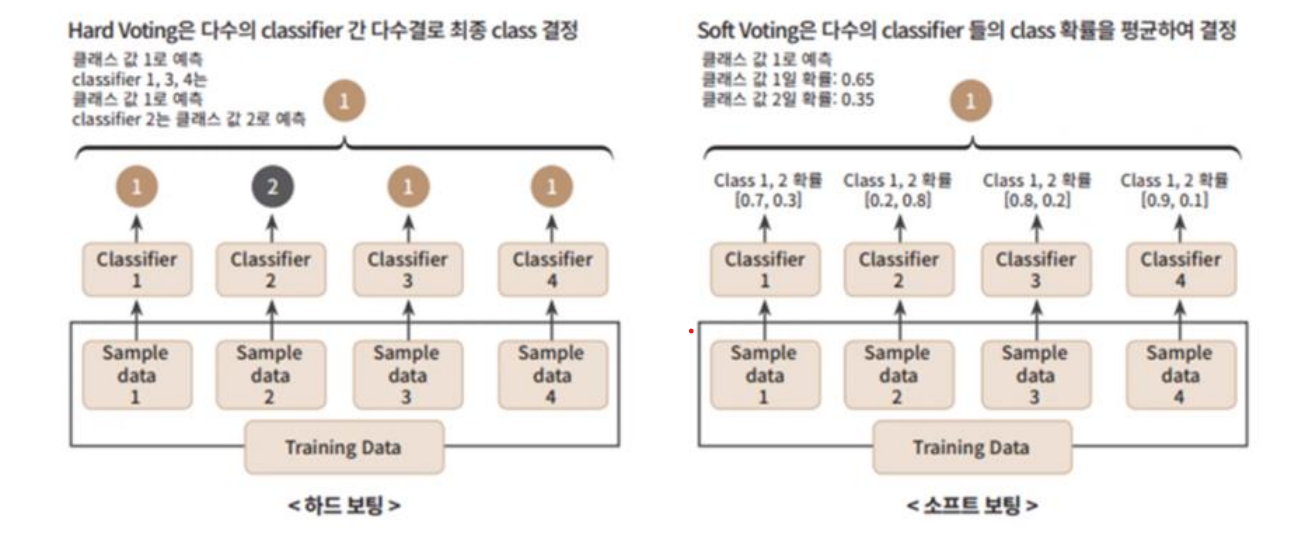

### 배깅(Bagging) : 여러 개의 같은 종류의 모델이 예측한 결과를 투표 혹은 평균을 통해 최종 예측 결과를 선정
   - 예: 랜덤포레스트
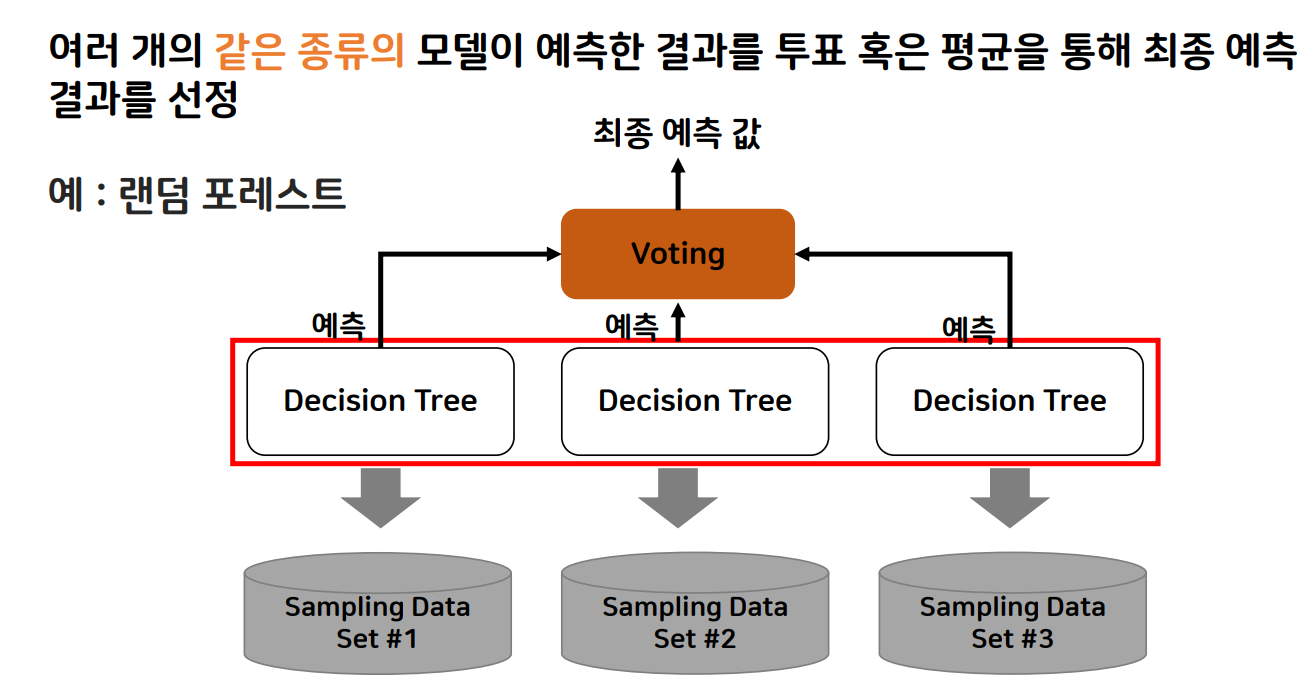

### 보팅 vs 배깅

   - 공통점: 여러 개의 모델이 투표 또는 평균을 통해 최종 예측 결과를 결정
   
   - 차이점
       - 보팅 > 서로 다른 모델을 결합
       - 배깅 > 같은 종류의 모델을 결합
                데이터샘플링을 다르게, 중첩 허용 -> Bootstrap 분할 방식

### 부스팅(Boosting) : 여러 개의 모델이 순차적으로 학습-에측하며 잘못 예측한 데이터에 가중치(weight)를 부여해 오류   를 개선해 나가면서 학습하는 방식
   - 예: AdaBoost, Gradient Boosting, XGBoost, LightGBM
 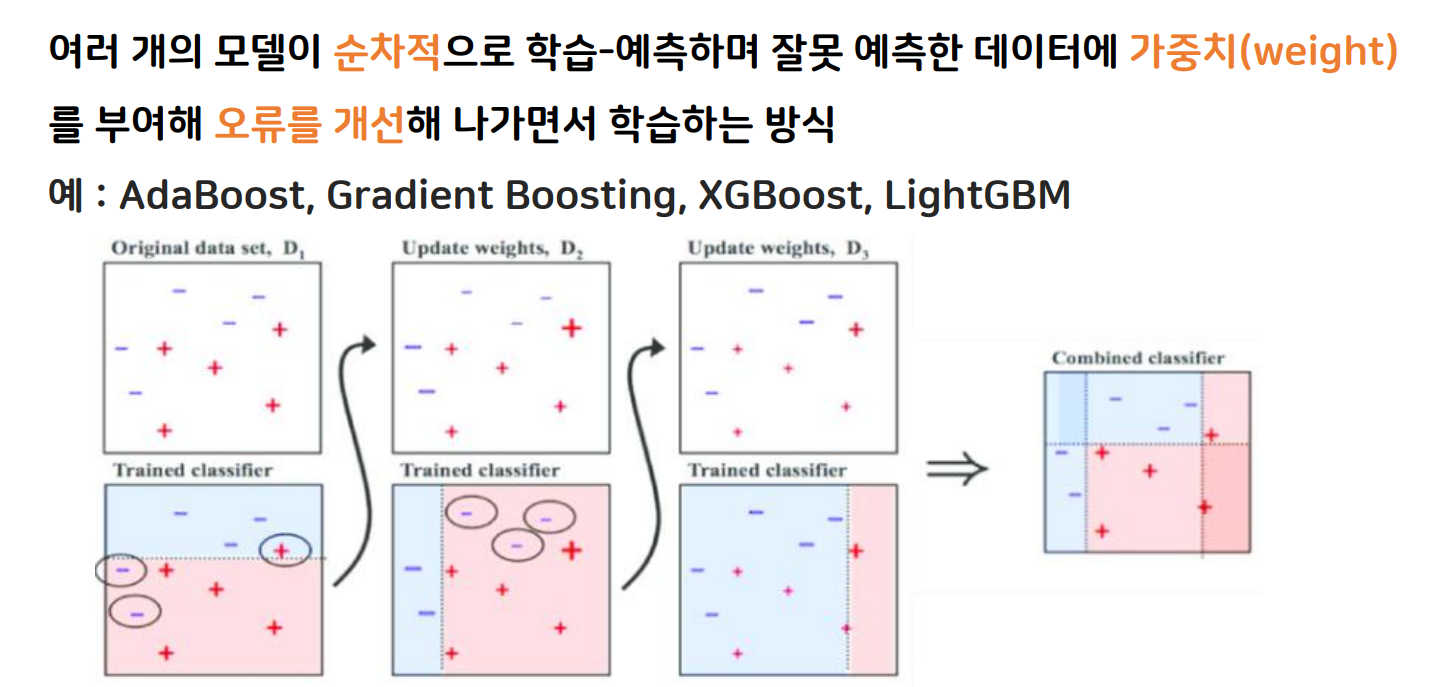

### 배깅 vs 부스팅
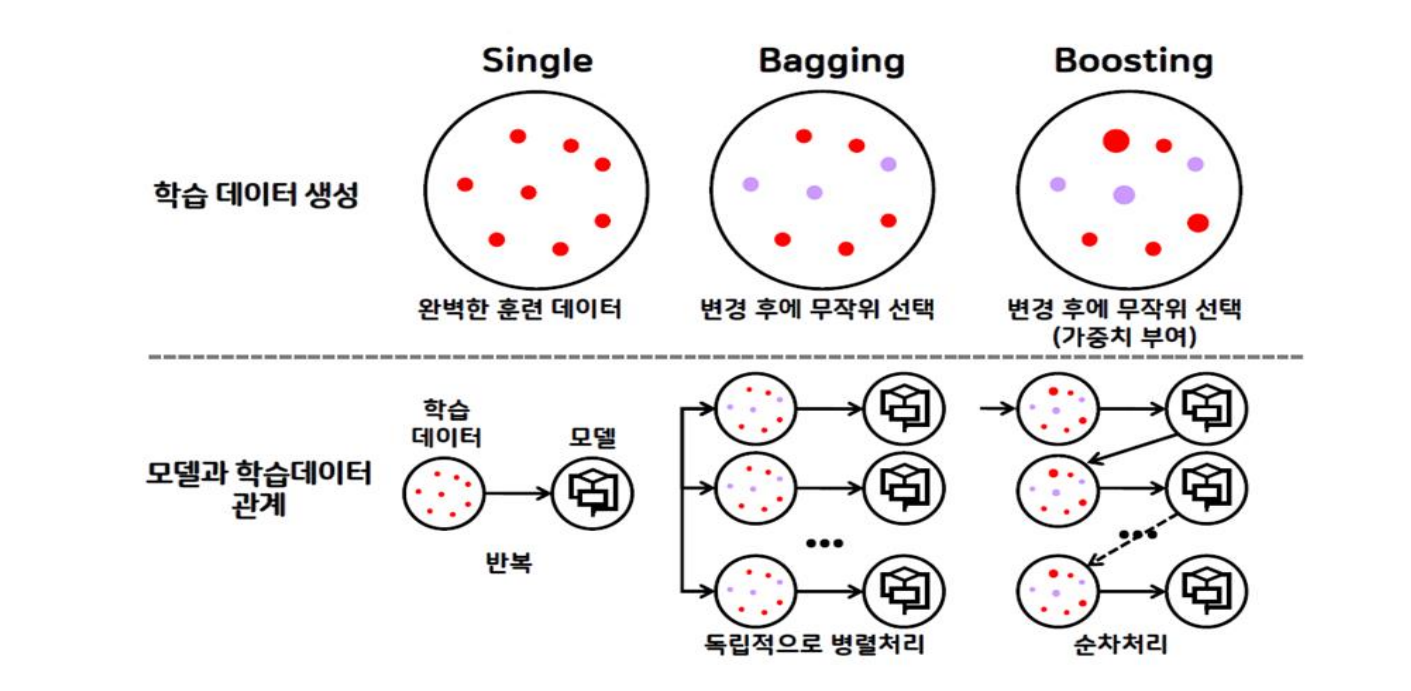
   - 배깅
       - 병렬 앙상블 모델(각 모델이 서로 독립적)
       - 목적: 일반적으로 좋은 모델을 만들기 위해 과대적합 방지(편향된 학습 방지)
       - 상황: 데이터 값들의 편차가 클 경우
       - 대표 알고리즘: Random Forest
       - 데이터 선택: 무작위 선택
        
   - 부스팅
       - 연속 앙상블(이전 모델의 오차를 고려)
       - 목적: 맞추기 어려운 문제를 풀기 위해 과소적합 방지(부족한 학습 방지)
       - 상황: 학습 정확도가 낮거나 오차가 클 경우
       - 대표 알고리즘: AdaBoost, Gradient Boosting, XGBoost, Light GBM
       - 데이터 선택: 무작위 선택(오류 데이터에 가중치 적용)

### RandomForest
   - 서로 다른 방향(알고리즘)으로 과대적합된 트리를 많이 만들고 평균을 내어 일반화
   - 다양한 트리를 만드는 방법
       - 트리를 만들 때 사용하는 데이터를 무작위로 선택
       - 노드 구성 시 기준이 되는 특성을 무작위로 선택
   - 분류와 회귀 모두 가능

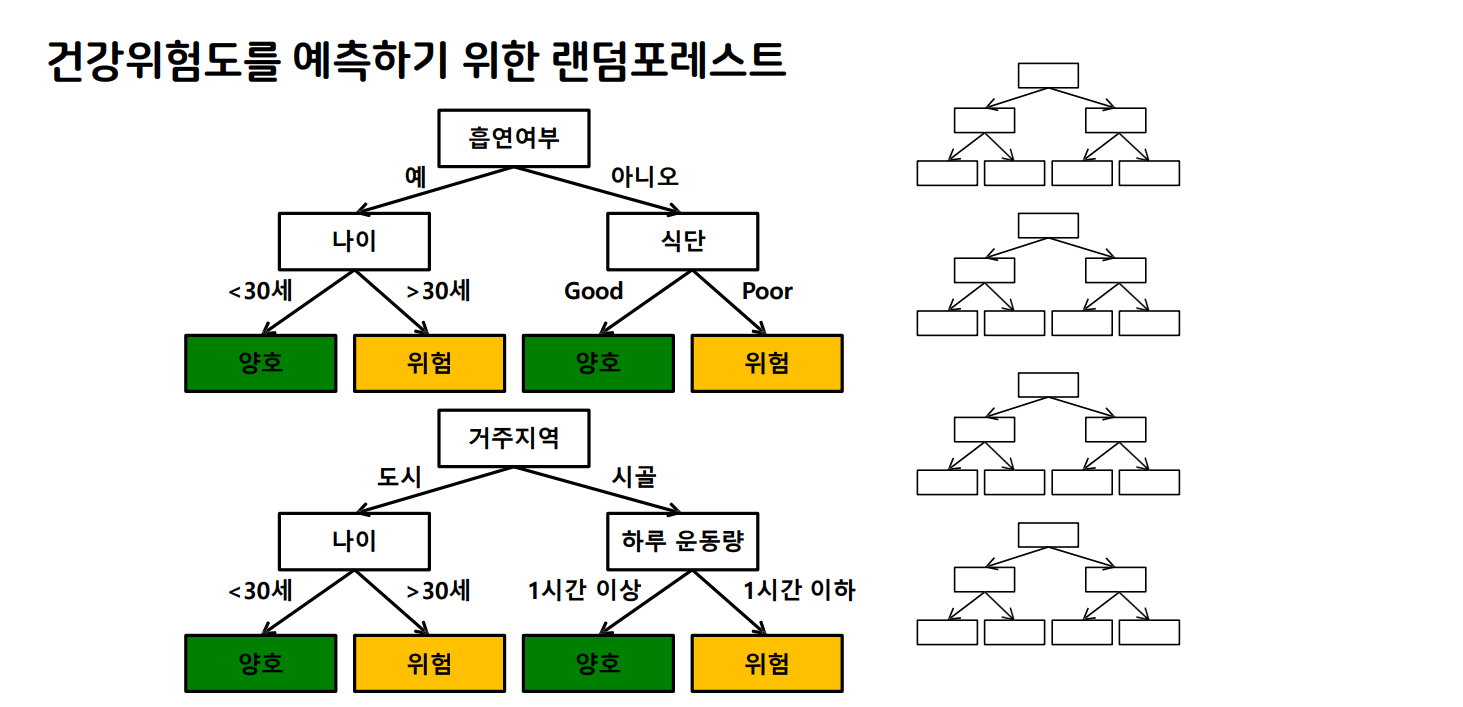

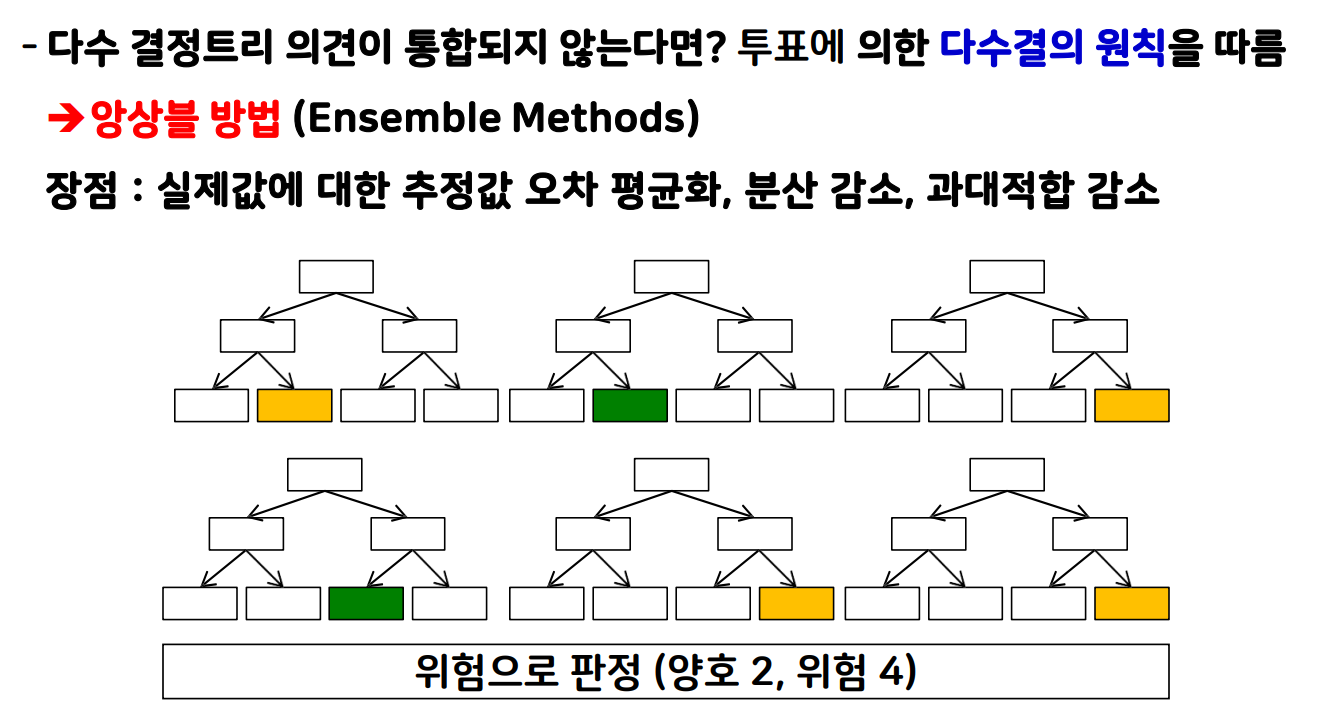

### 주요 매개변수(Hyperparameter)
   - RandomForestClassifier(n_estimators, max_features, random_state)
       - 트리의 개수: n_estimators
       - 선택할 특징의 최대 수: max_features
       - 선택할 데이터의 시드: random_state

In [1]:
# warnings 출력 X
import warnings
warnings.filterwarnings('ignore')

### 1. 전처리된 파일 불러오기

In [2]:
import pandas as pd

In [3]:
X_train = pd.read_csv('X_train.csv' )
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [4]:
X_train.shape, y_train.shape, X_test.shape

((891, 22), (891, 1), (418, 22))

### 2.1 RandomForest 모델 사용

In [5]:
# 여러 개의 의사결정 나무 결합되어 있는 모델 => 앙상블
from sklearn.ensemble import RandomForestClassifier

In [6]:
# 모델 생성
# n_estimators : 내가 사용할 의사결정나무의 갯수
# 기본적으로 앙상블 모델은 의사결정 나무의 결합이라, 의사결정나무의 하이퍼파라미터 사용가능하다
forest_model = RandomForestClassifier(max_depth=7)

### 2.2 교차 검증

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_model, X_train, y_train, cv=5)

array([0.81564246, 0.79775281, 0.83707865, 0.80337079, 0.84269663])

### 3. 학습

In [8]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

### 4. 평가

In [9]:
# 학습한 모델로 예측
pre = forest_model.predict(X_test)
pre

# 평가 결과 답안지 불러오기
sub = pd.read_csv('./data/titanic/gender_submission.csv')

# 평가 결과 답안지에 예측한 값 넣기
sub['Survived'] = pre
sub.to_csv('bjh_submission12.csv', index=False)

# 예측한 값 내보내기 ==> kaggle

In [10]:
# 하이퍼 파라미터 튜닝
# n_estimators를 50~80까지 바꿔가면서 결과 확인
for i in range(50, 81) :
    forest_model1 = RandomForestClassifier(n_estimators = i)
    # 교차검증으로 평가
    result = cross_val_score(forest_model1, X_train, y_train, cv=5).mean()
    print(f'n_estimators : {i}, score : {result}')

n_estimators : 50, score : 0.7923670830456343
n_estimators : 51, score : 0.7890151277383717
n_estimators : 52, score : 0.8024794425961961
n_estimators : 53, score : 0.8047203565375683
n_estimators : 54, score : 0.8047203565375682
n_estimators : 55, score : 0.8024919967359235
n_estimators : 56, score : 0.8058376749733224
n_estimators : 57, score : 0.7979850605737242
n_estimators : 58, score : 0.8069612704789405
n_estimators : 59, score : 0.8013621241604418
n_estimators : 60, score : 0.7979850605737242
n_estimators : 61, score : 0.8114430983616847
n_estimators : 62, score : 0.8047329106772958
n_estimators : 63, score : 0.7979787835038603
n_estimators : 64, score : 0.8047140794677045
n_estimators : 65, score : 0.80585022911305
n_estimators : 66, score : 0.7923733601154981
n_estimators : 67, score : 0.8013432929508506
n_estimators : 68, score : 0.8013621241604418
n_estimators : 69, score : 0.8058439520431863
n_estimators : 70, score : 0.8058439520431863
n_estimators : 71, score : 0.8092147

In [11]:
# 1. n_estimators 를 제한 --> for
for i in range(50, 81) : 30 - 50 ~ 80, 1씩 증가하는 값
# 2. max_depth를 제한 --> for
    for j in range(5, 10) : #5 - 5, 6, 7, 8, 9
# 30 * 5 = 150
# 최적의 하이퍼 파라미터 조합을 찾기 위해서는 여러개의 for문이 필요 ==> 복잡, 작업이 번거로워짐
# --> 이 문제를 한번에 해결하는 방법
# 한번에 여러개의 하이퍼파라미터를 튜닝해주는 함수 ==> GridSearhCV()

SyntaxError: invalid decimal literal (3526567219.py, line 2)

In [ ]:
# 1. 하이퍼 파라미터 튜닝
# GridSearchCV(모델, 사용할 하이퍼파라미터, cv)

# 1. 관심(궁금한)있는 하이퍼파라미터 지정
# n_estimators = [50, 70, 90, 110, 130, 150]  --> 50 ~ 150
# max_depth = [3, 4, 5, 6, 7, 8]
# max_features = [0.3, 0.4, 0.5, 0.6, 0.7]

# 2. 파라미터를 딕셔너리 형태로 저장 key : 사용할 하이퍼파라미터, value : 범위설정
param = {'n_estimators' : [50, 70, 90, 110, 130, 150],
         'max_depth' : [3, 4, 5, 6, 7, 8],
         'max_features' : [0.3, 0.4, 0.5, 0.6, 0.7]}

### GridSearchCV() 불러오기

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(), param, cv=5)

In [ ]:
# 2. 학습
grid.fit(X_train, y_train)

In [ ]:
# 3. 최적의 파라미터 조합 찾기
grid.best_params_

In [ ]:
# 4. 최적의 파라미터일 때 best_score_
grid.best_score_

In [ ]:
# 자세하게 찾아보기
param = {'n_estimators' : [48, 49, 50, 51, 52],
         'max_depth' : [6, 7, 8, 9, 10],
         'max_features' : [0.6, 0.7, 0.8]}

In [ ]:
grid1 = GridSearchCV(RandomForestClassifier(), param, cv=5)
grid1.fit(X_train, y_train)
print(grid1.best_params_)
print(grid1.best_score_)

In [ ]:
# 'max_depth': 8, 'max_features': 0.7, 'n_estimators': 51 ==> 베스트 모델 생성

forest_model1 = RandomForestClassifier(max_depth = 8, max_features = 0.7, n_estimators = 51)
forest_model1.fit(X_train, y_train)

In [ ]:
# 학습한 모델로 예측
pred = forest_model1.predict(X_test)
pred
# 평가 결과 답안지 불러오기 
# 평가 결과 답안지에 예측한 값 넣기
# 예측한 값 내보내기 ==> kaggle
sub = pd.read_csv('./data/titanic/gender_submission.csv')
sub['Survived'] = pred
sub.to_csv('sjy_submmision04.csv', index = False)